In [1]:
import qutip as qt   #import qutipa czyli biblioteki do kwantówki
import numpy as np   #import numpy czyli biblioteki do macierzy i wektorów itd.
import matplotlib.pyplot as plt  #import biblioteki do rysowania wykresów
from mpl_toolkits.mplot3d import Axes3D   #Rysowanie wykresów 3d
from matplotlib import animation  #importowanie biblioteki animacji

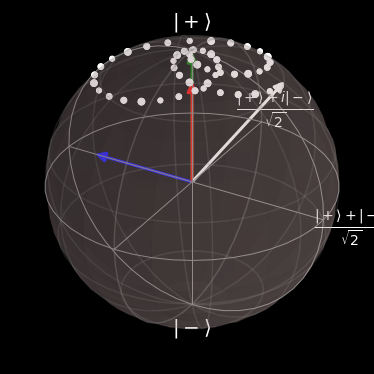

<Figure size 360x360 with 0 Axes>

In [3]:
#macierze pauliego
sx = qt.sigmax() #sigma_x
sy = qt.sigmay() #sigma_y
sz = qt.sigmaz() #sigma_z


#stany bazowe
plus = qt.basis(2,0)  #Stan |+>
minus = qt.basis(2,1)  #Stan |->


#stan poczatkowy cos(th/2)*|+> + sin(th/2)*e^{i phi}|->
th0 = 0  #kąt od bieguna północnego
phi0 = 0      #kąt od osi x (w płaszcyźnie równika)
stan0 = np.cos(th0/2)*plus + np.sin(th0/2)*np.exp(1j*phi0)*minus  #stan początkowy

#Ewolucja
bx = 0.0; by = 0; bz = 1        #Definiujemy wokół której osi ma się kręcić (bx,by,bz)
H0 = (bx*sx+by*sy+bz*sz).unit()   #Hamiltonian znormalizowany tzn. częstość kołowa omega = 1
tlist = np.linspace(0,2.5*np.pi,51)#Lista czasów (dająca obrót o pi)

#---------------------------------------------------------------------------
#NOWE! Hamiltonian zależny od czasu Hc(t) = cos(om t)sx + sin(om t)sy = cx(t)sx + cy(t) sy
def cx(t, args):   #args = {"om":omc,"A":A}, funkcja mnożąca sigmax 
    return args["A"]*np.cos(args["om"]*t) #odwołanie do słownika args i zmiennej "om" oraz "A"
def cy(t, args):   #args = {"om":omc}, funkcja mnożąca sigmax
    return args["A"]*np.sin(args["om"]*t)

omc = 2  #częstość kołowa kontroli, rezonans w omc = 1 (rozszczepienie kubitu)
A = 0.2  #Amplituda kontroli typowo dużo mniejsza niż rozszczepienie kubiru A<<1
res = qt.mesolve([H0,[sx,cx],[sy,cy]],stan0,tlist,args={"om":omc,"A":A})  #obliczamy ewolucję [H_0,[oper,cx(t)],[oper,cx(t)]]
#---------------------------------------------------------------------------
states = res.states              #Lista stanów w kolejnych chwilach czasu
ez = []                           #inicjalizacja listy rzutów na oś z
for state in states:
    ez.append(qt.expect(sz,state)) #rzut na oś z w każdej chwili czasu ez[i]
    #ez[i] = p_+[i] -  p_-[i] =>  2 p_+[i] - 1
    #więc p_+ = (ez+1)/2


#Rysujemy
fig = plt.figure(facecolor="black", figsize=(5,5))  #Okienko o proporcjach 5x5 o nazwie fig
ax = Axes3D(fig)           #Osie które wrzucamy do okienka fig
bloch = qt.Bloch(axes=ax)  #initializacja sfery blocha
plt.rcParams['axes.facecolor']='black'  #Upewniamy się że tło osi jest czarne

def init():    #Co powinny być na wyr
    bloch.zlabel = [r"$|+\rangle$",r"$|-\rangle$"] #zmieniamy oznaczenia osi z na |+>, |->
    bloch.xlabel = [r"$\frac{|+\rangle+|-\rangle}{\sqrt{2}}$",""] #osi x na (|+> + |->)/sqrt(2)
    bloch.ylabel = [r"$\frac{|+\rangle+i|-\rangle}{\sqrt{2}}$",""] #osi y na (|+> + i|->)/sqrt(2)
    bloch.vector_color = ['g']+["b"]+["r"]+["w"]*200  #pierwszy wektor zielonym (stan początkowy), 
                                            #drugi niebieskim(Hamiltonian), trzeci czerwony (rzut na z) 
                                            # kolejne 200 białym
    bloch.point_color = ["w"]
    bloch.point_marker = ["o"]
    bloch.font_color="w"   #kolor czcionki to biały
    return ax  #trzeba zwrócić oś
        
def animate(i): #rysowanie w itej klatce
    bloch.clear()                #czyszczę sferę
    bloch.add_states(stan0)      #stan początkwy
    #---nowe--------
    Hc = cx(tlist[i],args={"om":omc,"A":A})*sx + cy(tlist[i],args={"om":omc,"A":A})*sy  #Hamiltonian kontroli
    bloch.add_states(Hc*2)          #Hamiltonian (*5 żeby było go widać)
    alf = (180/np.pi)*omc*tlist[i]      #180/pi rad -> stpnie
    ax.view_init(30,30+alf)   #obrót sfery blocha
    #---------------
    bloch.add_states(ez[i]*sz/2) #rzut na oś z (dzielnie przez 2 to konwencja)
    bloch.add_states(states[i])  #dodaje aktualny stan
    for state in states[:i]:    #pętla po stanach wcześniejszych niż i
        ex = qt.expect(sx,state)  #rzut stanu na oś x (p(x+) - p(x-))
        ey = qt.expect(sy,state) #rzut stanu na oś y (p(y+) - p(y-))
        ez0 = qt.expect(sz,state) #rzut stanu na oś z (p(+) - p(-))
        bloch.add_points([ex,ey,ez0])  #rysuję stan poprzedni jako kropkę
    bloch.make_sphere()          #uaktualniam
    return ax #trzeba zwrócić oś
    
#Funkcja animująca (figura,rysunek w itej klatce, opisy osi, liczba klate, nie powtarzaj)
anim = animation.FuncAnimation(fig,animate,init_func = init,frames = len(states),repeat = False ) 

anim.save("anim.gif",fps=10)  #zapisuje do pliku





In [73]:
tlist

array([0.        , 0.31415927, 0.62831853, 0.9424778 , 1.25663706,
       1.57079633, 1.88495559, 2.19911486, 2.51327412, 2.82743339,
       3.14159265])

Text(0.5, 0, 'time')

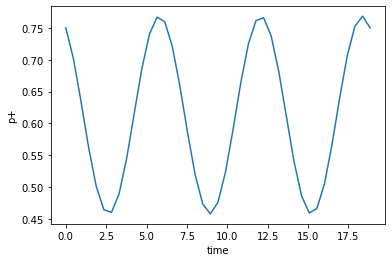

In [16]:
#Wykres prawdopodobieńśtwa zmierzenia |+> w funkcji czasu.
plt.plot(tlist, (np.array(ez) +1)/2 )
plt.ylabel("p+")
plt.xlabel("time")

In [16]:
bloch.view= [150,180/len(states)]

<Figure size 360x360 with 0 Axes>

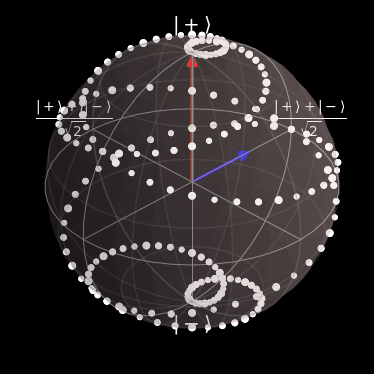

<Figure size 360x360 with 0 Axes>

In [61]:
#macierze pauliego
sx = qt.sigmax() #sigma_x
sy = qt.sigmay() #sigma_y
sz = qt.sigmaz() #sigma_z


#stany bazowe
plus = qt.basis(2,0)  #Stan |+>
minus = qt.basis(2,1)  #Stan |->


#stan poczatkowy cos(th/2)*|+> + sin(th/2)*e^{i phi}|->
th0 = 0  #kąt od bieguna północnego
phi0 = 0      #kąt od osi x (w płaszcyźnie równika)
stan0 = np.cos(th0/2)*plus + np.sin(th0/2)*np.exp(1j*phi0)*minus  #stan początkowy


#Ewolucja
bx = 0; by = 0; bz = 1      #Definiujemy wokół której osi ma się kręcić (bx,by,bz)
H = (bx*sx+by*sy+bz*sz).unit()   #Hamiltonian znormalizowany tzn. częstość kołowa omega = 1

omc = 1
A = 0.1
def cx(t, args):  # coefficient function
    return np.cos(args["om"]*t)

def cy(t, args):  # coefficient function
    return np.sin(args["om"]*t)

tlist = np.linspace(0,10*np.pi,201)#Lista czasów (dająca obrót o pi)
#res = qt.mesolve(H,stan0,tlist,args={"om":omc})  #obliczamy ewolucję
res = qt.mesolve([H,[A*sx,cx],[A*sy,cy]],stan0,tlist,args={"om":omc})  #obliczamy ewolucję
states = res.states              #Lista stanów w kolejnych chwilach czasu

ez = []                           #inicjalizacja listy rzutów na oś z
for state in states:
    ez.append(qt.expect(sz,state)) #rzut na oś z w każdej chwili czasu ez[i]
    #ez[i] = p_+[i] -  p_-[i] =>  2 p_+[i] - 1
    #więc p_+ = (ez+1)/2


#Rysujemy
fig = plt.figure(facecolor="black", figsize=(6,5))  #Okienko o proporcjach 5x5 o nazwie fig
ax = Axes3D(fig)           #Osie które wrzucamy do okienka fig
bloch = qt.Bloch(axes=ax)  #initializacja sfery blocha
plt.rcParams['axes.facecolor']='black'  #Upewniamy się że tło osi jest czarne

def init():    #Co powinny być na wyr
    bloch.zlabel = [r"$|+\rangle$",r"$|-\rangle$"] #zmieniamy oznaczenia osi z na |+>, |->
    bloch.xlabel = [r"$\frac{|+\rangle+|-\rangle}{\sqrt{2}}$",""] #osi x na (|+> + |->)/sqrt(2)
    bloch.ylabel = [r"$\frac{|+\rangle+i|-\rangle}{\sqrt{2}}$",""] #osi y na (|+> + i|->)/sqrt(2)
    bloch.vector_color = ['g']+["b"]+["r"]+["w"]*200  #pierwszy wektor zielonym (stan początkowy), 
                                            #drugi niebieskim(Hamiltonian), trzeci czerwony (rzut na z) 
                                            # kolejne 200 białym
    bloch.point_color = ['w']
    bloch.point_marker = ['o']
    bloch.font_color="w"   #kolor czcionki to biały
    return ax  #trzeba zwrócić oś
        
def animate(i): #rysowanie w itej klatce
    bloch.clear()                #czyszczę sferę
    rot = 180/np.pi*omc*tlist[i]
    ax.view_init(30+0.01*i, 135)
    bloch.add_states(stan0)      #stan początkwy
    hx = A/2*(sx*cx(tlist[i],args={"om":omc}))
    hy = A/2*(sy*cy(tlist[i],args={"om":omc}))       
    bloch.add_states(6*(hx+hy))          #Hamiltonian
    #bloch.add_states(H)          #Hamiltonian
    #bloch.add_states(ez[i]*sz/2) #rzut na oś z (dzielnie przez 2 to konwencja)
    bloch.add_states(states[i])  #dodaje aktualny stan
    for state in states[:i]:
        ex = qt.expect(sx,state)
        ey = qt.expect(sy,state)
        ez0 = qt.expect(sz,state)
        bloch.add_points([ex,ey,ez0])
    bloch.make_sphere()          #uaktualniam
    return ax #trzeba zwrócić oś
    
#Funkcja animująca (figura,rysunek w itej klatce, opisy osi, liczba klate, nie powtarzaj)
anim = animation.FuncAnimation(fig,animate,init_func = init,frames = len(states),repeat = False ) 

anim.save("anim.gif",fps=10)  #zapisuje do pliku



